In [2]:
# 구글 드라이브 MOUNT
from google.colab import drive
drive.mount('/content/drive')

# github와 연동하고 싶은 폴더로 이동
%cd /content/drive/MyDrive/Study_DL/Study_DL


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Study_DL/Study_DL


# yolov5 다운로드
참고: 
https://velog.io/@yooniverseis/YOLO-v5-%EC%8B%A4%EC%8A%B5%ED%95%B4%EB%B3%B4%EA%B8%B0

In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15218, done.
remote: Total 15218 (delta 0), reused 0 (delta 0), pack-reused 15218
Receiving objects: 100% (15218/15218), 14.15 MiB | 15.73 MiB/s, done.
Resolving deltas: 100% (10443/10443), done.


In [ ]:
# 플랫폼
import platform
platform.platform()

'Linux-5.10.147+-x86_64-with-glibc2.29'

In [ ]:
# os 확인

!cat /etc/issue.net

Ubuntu 20.04.5 LTS


In [ ]:
# 메모리 사양

!cat /proc/meminfo

MemTotal:       13297200 kB
MemFree:         9258360 kB
MemAvailable:   12299316 kB
Buffers:          352264 kB
Cached:          2857360 kB
SwapCached:            0 kB
Active:           679536 kB
Inactive:        3122080 kB
Active(anon):        984 kB
Inactive(anon):   567520 kB
Active(file):     678552 kB
Inactive(file):  2554560 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:              2564 kB
Writeback:             0 kB
AnonPages:        592024 kB
Mapped:           272148 kB
Shmem:              1304 kB
KReclaimable:      98592 kB
Slab:             129660 kB
SReclaimable:      98592 kB
SUnreclaim:        31068 kB
KernelStack:        5600 kB
PageTables:        10596 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6648600 kB
Committed_AS:    3202476 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       51432 kB
VmallocChunk:          0 kB
Percpu:          

In [ ]:
# 디스크
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay          79G   25G   54G  32% /
tmpfs            64M     0   64M   0% /dev
shm             5.7G     0  5.7G   0% /dev/shm
/dev/root       2.0G  1.1G  841M  58% /usr/sbin/docker-init
/dev/sda1        78G   51G   28G  65% /opt/bin/.nvidia
tmpfs           6.4G   32K  6.4G   1% /var/colab
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive            79G   54G   25G  69% /content/drive


In [ ]:
# GPU

!nvidia-smi

Sun Feb 19 10:15:53 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P0    28W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# 로보플로우의 훈련 이미지 데이터 다운

In [ ]:
!curl -L "https://public.roboflow.com/ds/HWijnDGcIL?key=0cqXpqmnlR" >roboflow.zip; unzip roboflow.zip; rm roboflow.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 extracting: train/labels/000605_jpg.rf.0c32e7a0bc3cb35efb487e563bd531d2.txt  
 extracting: train/labels/000343_jpg.rf.0c2f20c5673eb0132c8f6d63906c5f2d.txt  
 extracting: train/labels/004238_jpg.rf.0c3465deac398afe856c752cc9d98852.txt  
 extracting: train/labels/004029_jpg.rf.0c5c615d8dc20133e108e813eca4234a.txt  
 extracting: train/labels/002532_jpg.rf.0cc8d54d2b360fa57e5402d53edae103.txt  
 extracting: train/labels/001680_jpg.rf.0c5c6aceea85a79a7a2404a54a6edc68.txt  
 extracting: train/labels/000015_jpg.rf.0c0cedbd11befb87888bc8887dca5a52.txt  
 extracting: train/labels/004978_jpg.rf.0cd5eb9b3507044f9cdcc2f2abee4f0b.txt  
 extracting: train/labels/002500_jpg.rf.0c525ff7b9202f6ed81fbcc8a1ce7831.txt  
 extracting: train/labels/003833_jpg.rf.0c6929cb9362e0f95beed22139bcb644.txt  
 extracting: train/labels/002127_jpg.rf.0a642389755589a074e3a2e35c8f4d0f.txt  
 extracting: train/labels/005215_jpg.rf.0c3bc4a4b40f03461eb7ae77a252210a.txt  
 extracting: tra

# yolov5 실행을 위한 준비

In [ ]:
%cd ./yolov5

!pip install -r requirements.txt

/content/drive/MyDrive/study_DL/Study_DL/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 77.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 82.1 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cvxpy 1.2.3 requires setuptools<=64.0.2, but you have setuptools 67.3.2 which is incompatible.


In [ ]:
with open('../../필요데이터/yolov5/data.yaml', 'r') as fr:
  x = fr.read()
print(x)

names:
- head
- helmet
- person
nc: 3
train: "../../\u1111\u1175\u11AF\u110B\u116D\u1103\u1166\u110B\u1175\u1110\u1165/yolov5/train.txt"
val: "../../\uD544\uC694\uB370\uC774\uD130/yolov5/val.txt"



- nc: 클래스 개수
- names: 클래스 이름

In [23]:
data = '''names:
- head
- helmet
- person
nc: 3
'''

with open('../필요데이터/yolov5/data.yaml', 'w') as fw:
  fw.write(data)

with open('../필요데이터/yolov5/data.yaml', 'r') as fr:
  data = fr.read()

print(data)


names:
- head
- helmet
- person
nc: 3



## train, validation data 나누기

In [5]:
from glob import glob

train_img_list = glob('../필요데이터/yolov5/train/images/*.jpg')
print(len(train_img_list))

img_list = glob('../필요데이터/yolov5/test/images/*.jpg')
print(len(img_list))


5269
1766


In [6]:
train_img_list[:10]

['../필요데이터/yolov5/train/images/001415_jpg.rf.ccf02633aae59ec8cf5a8f5830cfb119.jpg',
 '../필요데이터/yolov5/train/images/003609_jpg.rf.d4e713b4f111335319857901dd7af550.jpg',
 '../필요데이터/yolov5/train/images/004273_jpg.rf.cdb770dd32ee25cf0d5f87c875402607.jpg',
 '../필요데이터/yolov5/train/images/000430_jpg.rf.cb1198604d9485a5ef877179aa53eae8.jpg',
 '../필요데이터/yolov5/train/images/002209_jpg.rf.ce363387e94de43a6226393c0a70044d.jpg',
 '../필요데이터/yolov5/train/images/000765_jpg.rf.cf1625939ce63f2fae076ed424ed85a0.jpg',
 '../필요데이터/yolov5/train/images/005257_jpg.rf.cd9bc1ed0507991ff03e525cbe527b93.jpg',
 '../필요데이터/yolov5/train/images/004134_jpg.rf.cb32b7919abe5affd78382ab6939938f.jpg',
 '../필요데이터/yolov5/train/images/003124_jpg.rf.c9302fd2a7461c24e667d2f3c6d1604d.jpg',
 '../필요데이터/yolov5/train/images/004439_jpg.rf.d51e38583b5fea14500935fd72519fa7.jpg']

In [7]:
from sklearn.model_selection import train_test_split

train_imgs_li, val_imgs_li = train_test_split(train_img_list, test_size = 0.2, random_state = 2000)
len(train_imgs_li), len(val_imgs_li)

(4215, 1054)

In [15]:
with open('../필요데이터/yolov5/train.txt', 'w') as f:
  f.write('\n'.join(train_imgs_li)+'\n')

with open('../필요데이터/yolov5/val.txt', 'w') as f:
  f.write('\n'.join(val_imgs_li)+'\n')

In [25]:
with open('../필요데이터/yolov5/data.yaml', 'r') as f:
  data = f.read()

print(data)

names:
- head
- helmet
- person
nc: 3
train: "../\u1111\u1175\u11AF\u110B\u116D\u1103\u1166\u110B\u1175\u1110\u1165/yolov5/train.txt"
val: "../\uD544\uC694\uB370\uC774\uD130/yolov5/val.txt"



# 학습하기

In [27]:
%cd ../yolov5/
## img: 이미지 크기
## data:  데이터파일 
## cfg: 위에서 정한 모델 크기
## weights: 미리 학습된 모델로 학습할 경우
## name: 학습된 모델의 이름

!python train.py --img 416 --batch 16 --epochs 50 --data ../필요데이터/yolov5/data.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt --name hat_yolov5s_result

/content/drive/MyDrive/Study_DL/yolov5
requirements: YOLOv5 requirement "gitpython" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 8.8 MB/s eta 0:00:00

requirements: 1 package updated per ['gitpython']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

train: weights=yolov5s.pt, cfg=./models/yolov5s.yaml, data=../필요데이터/yolov5/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=hat_yolov5s_result, exist_ok=False, quad=False, cos_lr=False, label_smo

# 학습 평가 결과 

In [30]:
!pwd

/content/drive/MyDrive/Study_DL/yolov5


In [51]:
from IPython.display import Image
from utils.plots import plot_results 
 
Image(filename='./runs/train/hat_yolov5s_results10/results.png', width=1000)

FileNotFoundError: ignored

GROUND TRUTH TRAINING DATA:


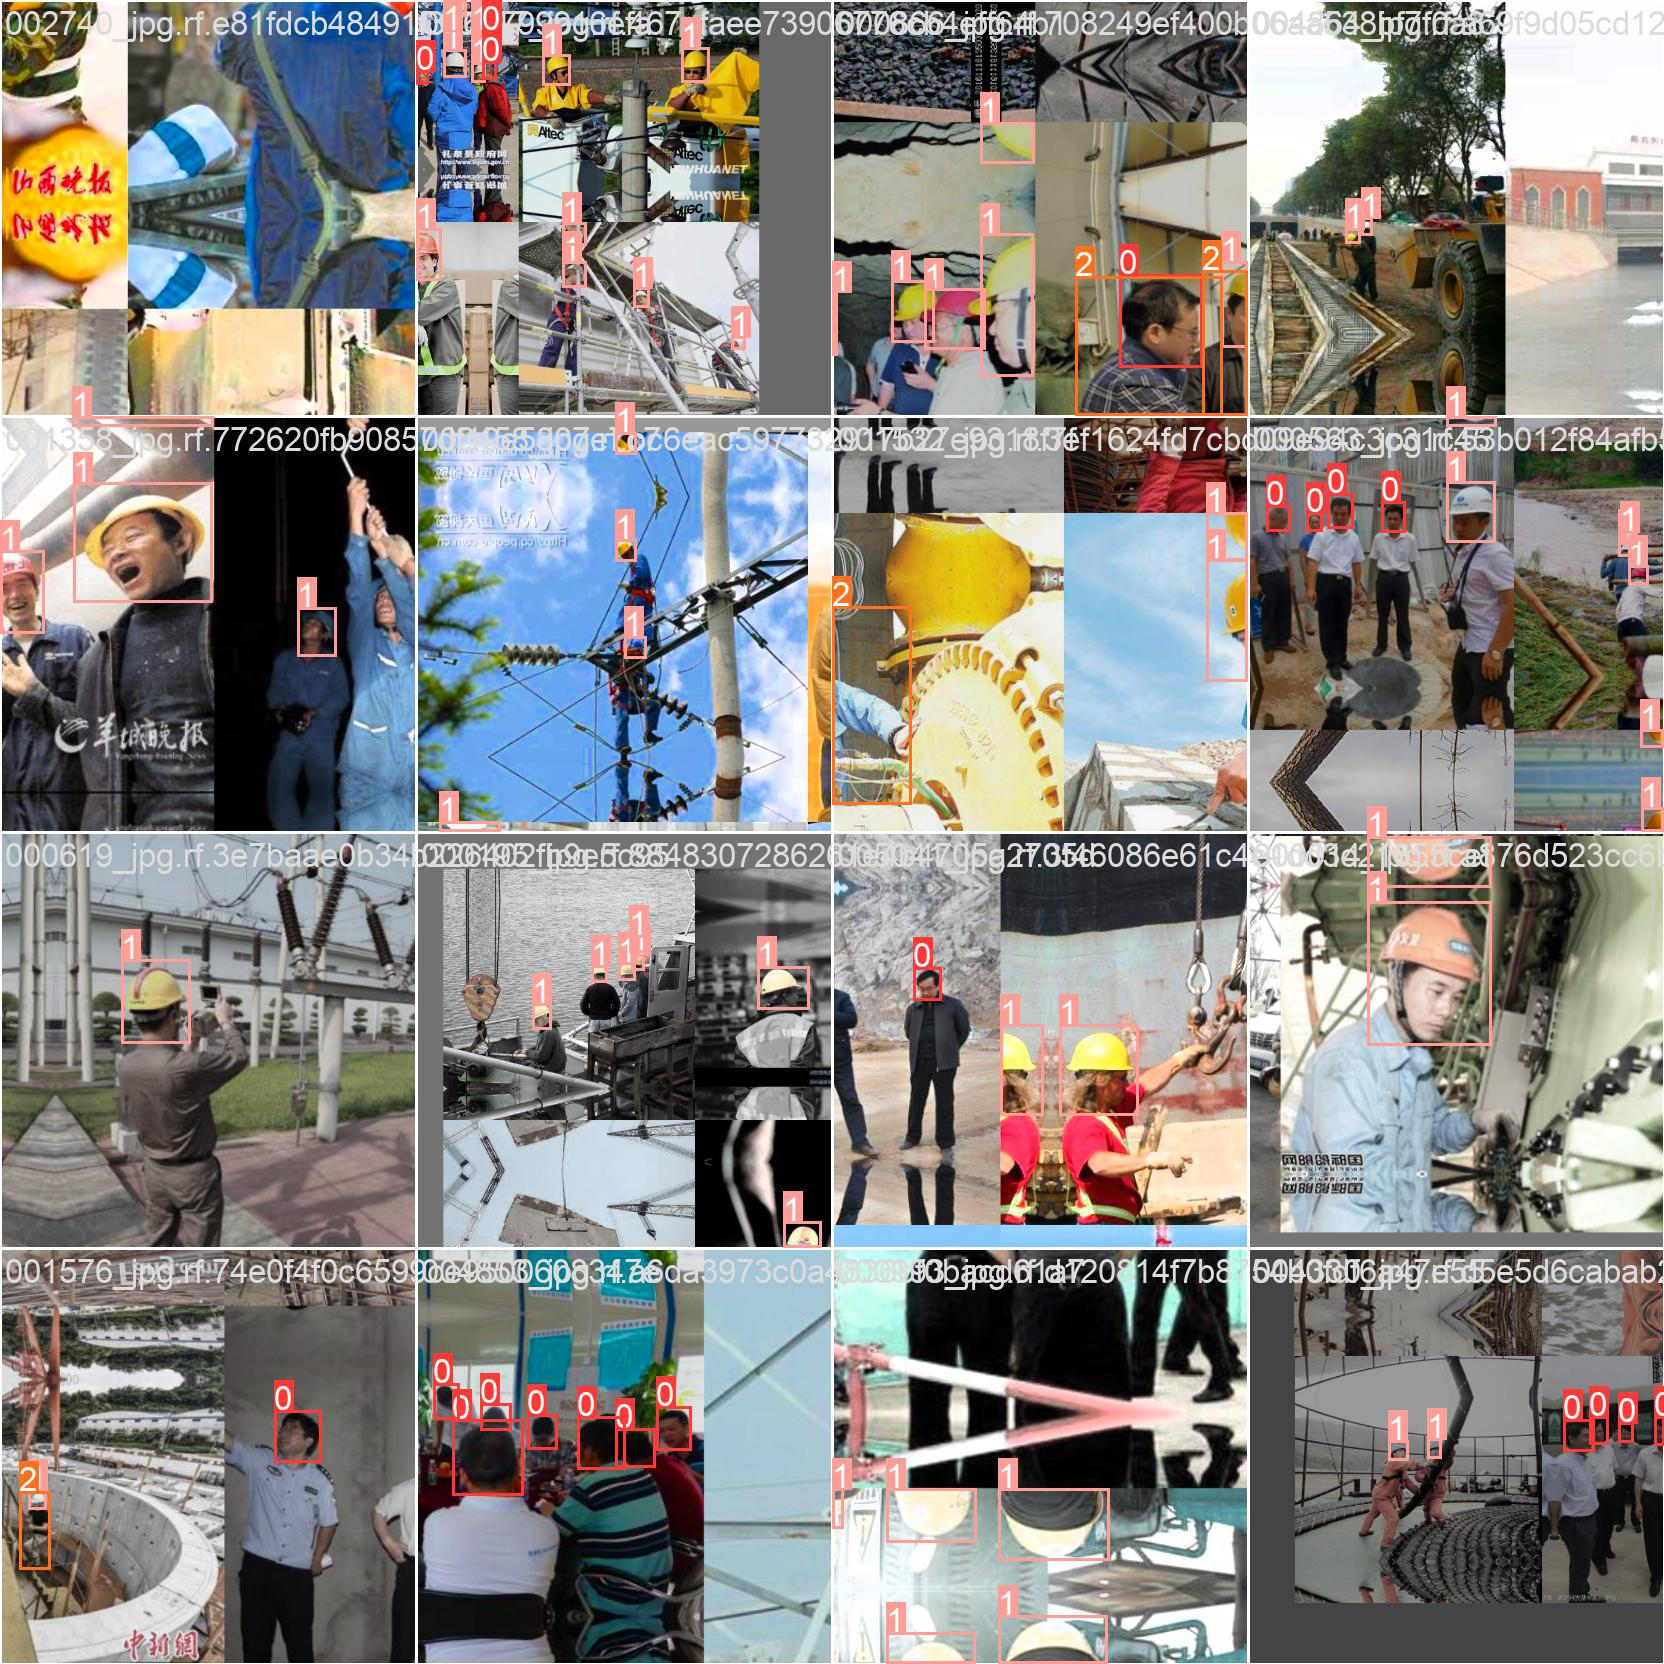

In [32]:
# 정답으로 예측하길 바라는 data
print("GROUND TRUTH TRAINING DATA:")

Image(filename='./runs/train/hat_yolov5s_result10/train_batch0.jpg', width=900)

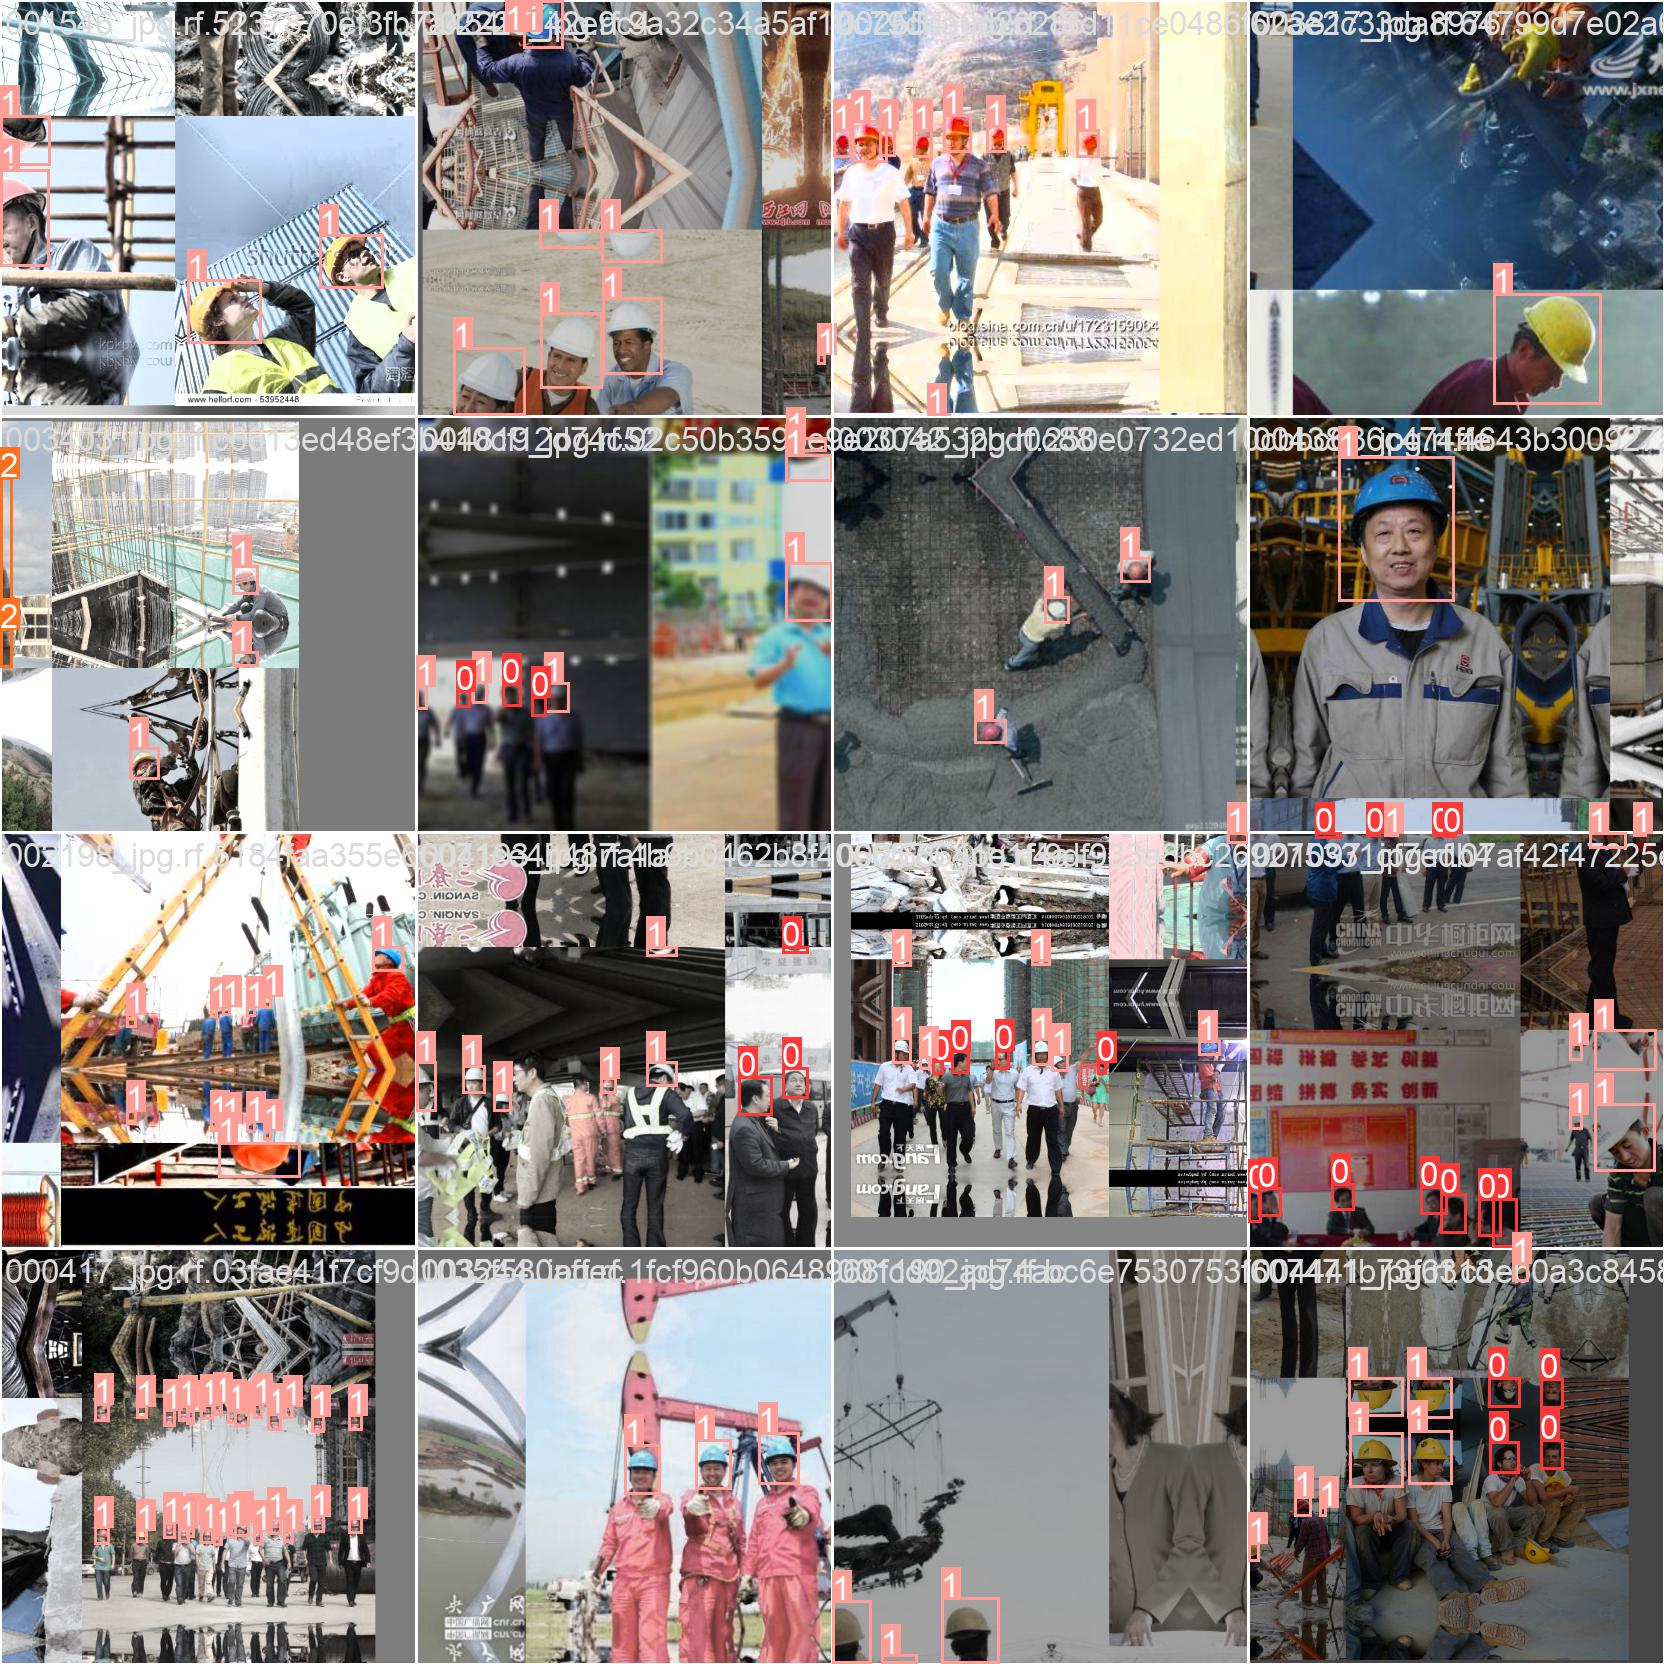

In [33]:
Image(filename='./runs/train/hat_yolov5s_result10/train_batch1.jpg', width=900)

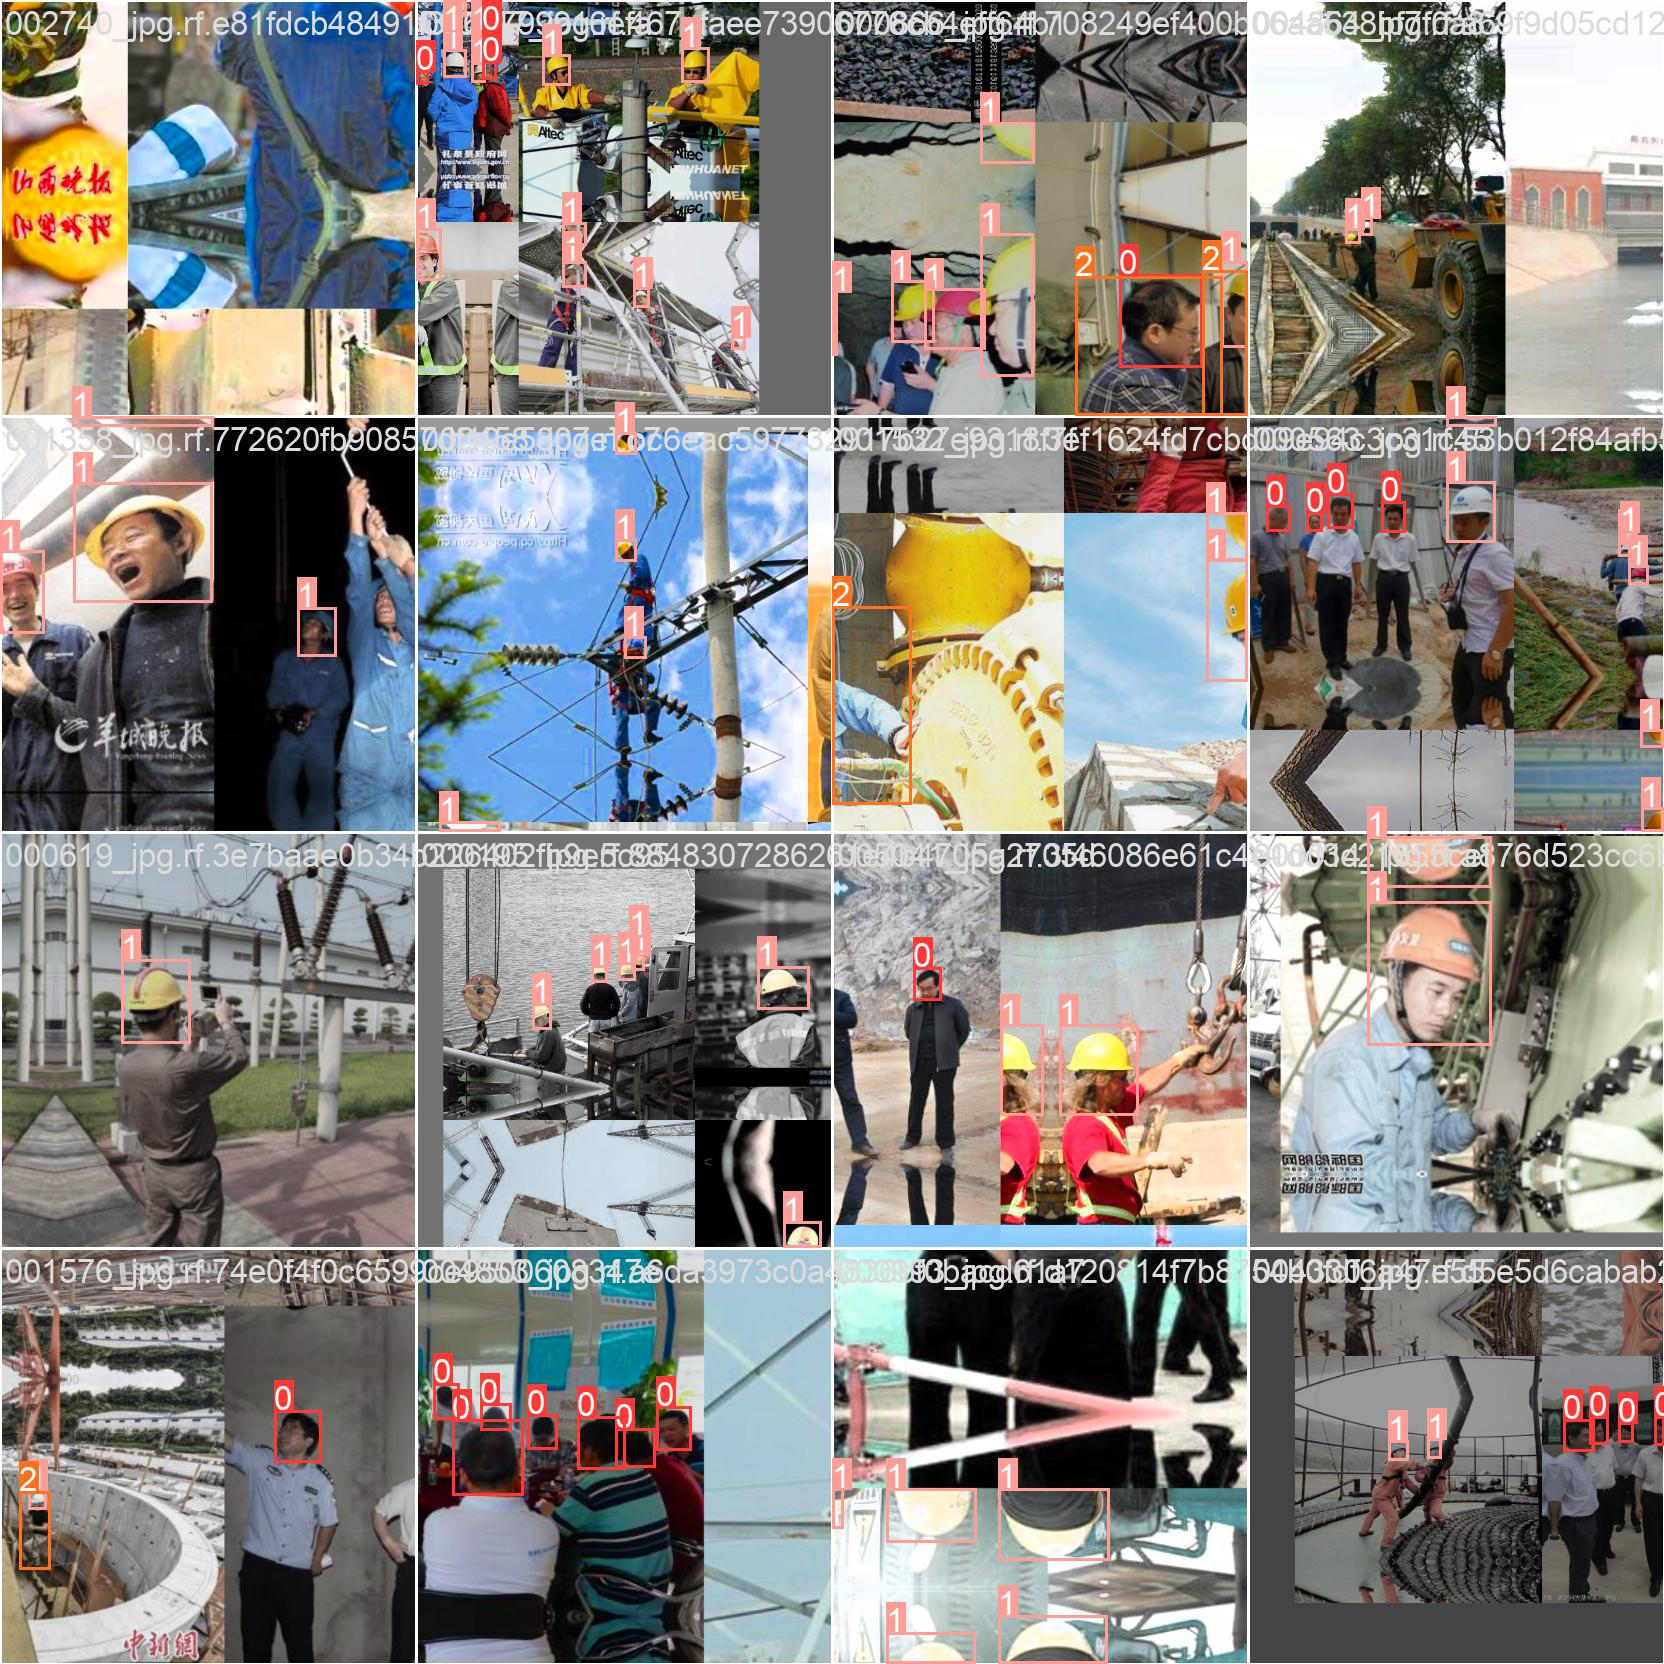

In [34]:
Image(filename='./runs/train/hat_yolov5s_result10/train_batch2.jpg', width=900)

# 예측

In [35]:
from glob import glob

test_img_list = glob('../필요데이터/yolov5/test/images/*.jpg')
print(len(test_img_list))

1766


detect: weights=['./runs/train/hat_yolov5s_result10/weights/best.pt'], source=../필요데이터/yolov5/test/images/006994_jpg.rf.7cddfbe607b9c5896396aa1ad477d590.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-107-g7a972e8 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/drive/MyDrive/Study_DL/필요데이터/yolov5/test/images/006994_jpg.rf.7cddfbe607b9c5896396aa1ad477d590.jpg: 416x416 6 helmets, 12.5ms
Speed: 0.5ms pre-process, 12.5ms inference, 2.3ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs

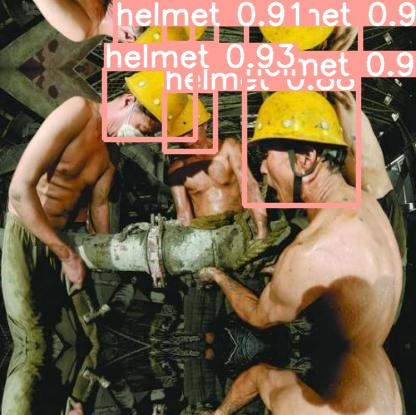

In [36]:
from IPython.display import Image
import os

test_path =test_img_list[1]

!python detect.py --weights ./runs/train/hat_yolov5s_result10/weights/best.pt --img 416 --conf 0.5 --exist-ok --source "{test_path}"

Image(os.path.join('./runs/detect/exp', os.path.basename(test_path)))

In [42]:
import matplotlib.pyplot as plt
import cv2

test_path =test_img_list[1:21]

for i in range(20):
  !python detect.py --weights ./runs/train/hat_yolov5s_result10/weights/best.pt --img 416 --conf 0.5 --exist-ok --source "{test_path[i]}"

detect: weights=['./runs/train/hat_yolov5s_result10/weights/best.pt'], source=../필요데이터/yolov5/test/images/006994_jpg.rf.7cddfbe607b9c5896396aa1ad477d590.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-107-g7a972e8 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/drive/MyDrive/Study_DL/필요데이터/yolov5/test/images/006994_jpg.rf.7cddfbe607b9c5896396aa1ad477d590.jpg: 416x416 6 helmets, 8.2ms
Speed: 0.4ms pre-process, 8.2ms inference, 1.4ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/d

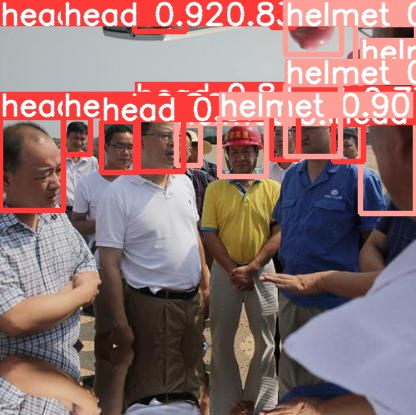

In [60]:
test_path = test_img_list[3]
Image(os.path.join('./runs/detect/exp', os.path.basename(test_path)))